# HW1: Application Questions

CS 539 Machine Learning

Aukkawut Ammartayakun

In [1]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## 1. Sampling from a distribution (15 pts)  
Here, we want to learn:

a) basics of sampling,

b) characteristics of multi-variate Gaussian distribution,
  
c) connections between number of samples and our ML estimate 

(a) Draw 100 samples $\mathbf{x} = \begin{bmatrix}x_1 & x_2\end{bmatrix}$ from a 2-dimensional Gaussian distribution with mean $\begin{bmatrix}0 \\ 0\end{bmatrix}$ 
and identity covariance matrix i.e. $p(\mathbf{x}) = \frac{1}{2\pi}\exp\left(-\frac{||\mathbf{x}||^2}{2}\right)$. Plot sample data points on a scatter 
plot ($x_1$ vs. $x_2$). 

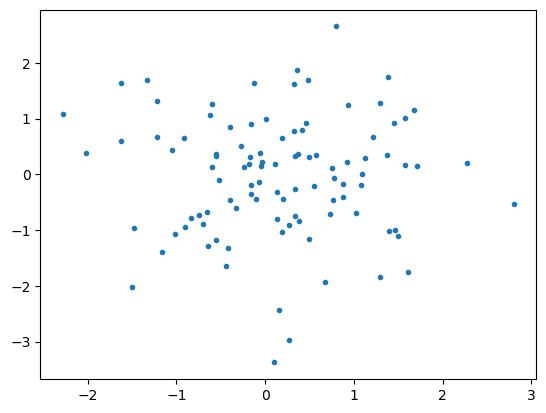

In [7]:
#draw 100 sample from 2d gaussian distribution
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # identity covariance
x1, x2 = np.random.multivariate_normal(mean, cov, 100).T
#plot x1 and x2
plt.plot(x1, x2, '.')

(b) How does the scatter plot change if the mean is $\begin{bmatrix}-1\\1\end{bmatrix}$? (For the questions below, change 
the mean back to $\begin{bmatrix}0\\0\end{bmatrix}$). Show the new scatter plot and discuss your results. 

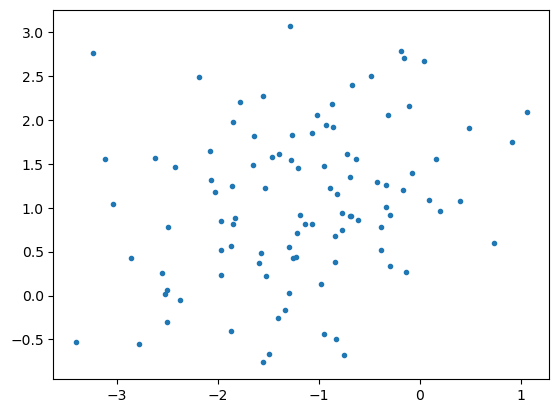

In [6]:
#draw 100 sample from 2d gaussian distribution
mean2 = [-1, 1]
cov = [[1, 0], [0, 1]]  # identity covariance
x1, x2 = np.random.multivariate_normal(mean2, cov, 100).T
#plot x1 and x2
plt.plot(x1, x2, '.')

The results shows that the scatter plot is more spread out towards the new mean.

(c) How does the scatter plot change if you double the variance of each component ($x_1$ and $x_2$)?

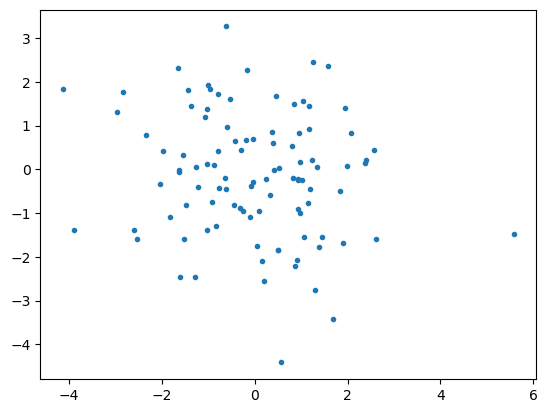

In [8]:
#draw 100 sample from 2d gaussian distribution
mean = [0, 0]
cov = [[2, 0], [0, 2]]  # 2*identity covariance
x1, x2 = np.random.multivariate_normal(mean, cov, 100).T
#plot x1 and x2
plt.plot(x1, x2, '.')

The results shows that the scatter plot is more spread out. However, the spread is more radical than the previous example where it is still centered around the mean.

(d) How does the scatter plot change if the covariance matrix is changed to the following? 
$$\begin{bmatrix}1 & 0.5 \\0.5 & 1\end{bmatrix}$$

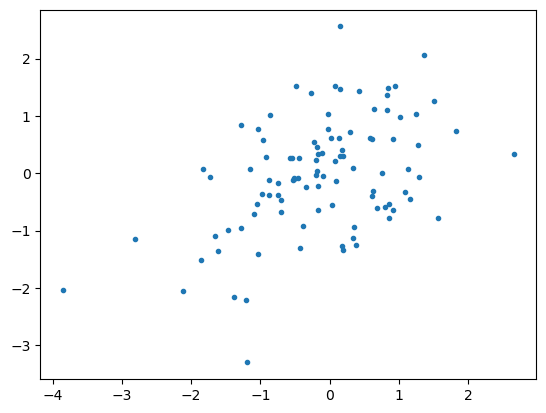

In [9]:
#draw 100 sample from 2d gaussian distribution
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]  
x1, x2 = np.random.multivariate_normal(mean, cov, 100).T
#plot x1 and x2
plt.plot(x1, x2, '.')

The spread itself is directional to the covariance matrix. Since it is both positive, the random points are spread out in a positive diagonal direction.

(e) How does the scatter plot change if the covariance matrix is changed to the following? 

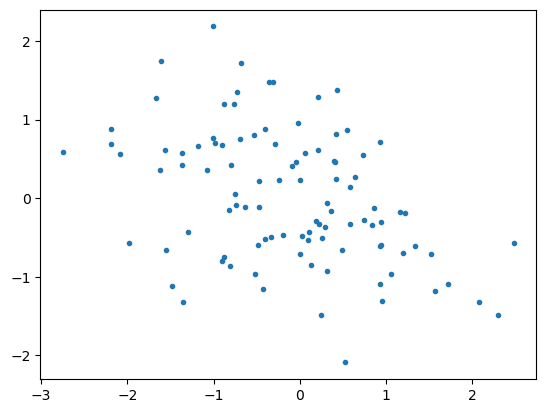

In [10]:
#draw 100 sample from 2d gaussian distribution
mean = [0, 0]
cov = [[1, -0.5], [-0.5, 1]]  
x1, x2 = np.random.multivariate_normal(mean, cov, 100).T
#plot x1 and x2
plt.plot(x1, x2, '.')

The spread itself is directional to the covariance matrix. Since it is both negative, the random points are spread out in a negative diagonal direction.

(f) Calculate the mean and covariance for part (e) using the 100 samples you drew. 

In [18]:
#mean
est_mean = [np.mean(x1), np.mean(x2)]
#covariance
X = np.stack((x1, x2), axis=0)
est_cov = np.cov(X)
print(f"estimated mean = {est_mean}")
print(f"estimated covariance = {est_cov}")

estimated mean = [-0.12982803314745112, 0.00971474551613377]
estimated covariance = [[ 1.05615871 -0.35654196]
 [-0.35654196  0.71357318]]


(g) For the distribution defined in (e), draw 1000 samples and show the scatter plot. 

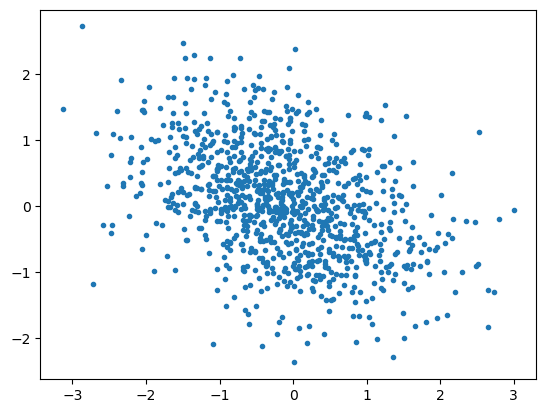

In [19]:
#draw 1000 samples from the distribution from (g)
x1, x2 = np.random.multivariate_normal(est_mean, est_cov, 1000).T
#plot x1 and x2
plt.plot(x1, x2, '.')

(h) For the 1000 samples you drew in (g), calculate the mean and covariance of the distribution. 

In [20]:
#mean
est_mean = [np.mean(x1), np.mean(x2)]
#covariance
X = np.stack((x1, x2), axis=0)
est_cov = np.cov(X)
print(f"estimated mean = {est_mean}")
print(f"estimated covariance = {est_cov}")

estimated mean = [-0.13673321104381175, 0.06290583362019951]
estimated covariance = [[ 0.96423589 -0.32975051]
 [-0.32975051  0.7010452 ]]


(i) Note that you can get different estimates of the mean and covariance, every time you draw 
samples from your distribution. Discuss how your estimate of the mean of $x_1$ varies as a 
function of the number of drawn samples. Discuss this for 10, 100, and 1000 samples. 



Since the estimation of the mean of $x_1$ in this case is to find the empirical mean of the samples, that is
$$\bar{x}_1 = \frac{1}{n}\sum_{i=0}^{n} x_{1,i}$$
where $n$ is the number of samples. This shows that our estimation is also a function of number of samples. This implies that tahe more samples we have, the more accurate the estimation of the mean will be. This is because the more samples we have, the more likely that the mean will be closer to the true mean. 

(j) Note that you can get different estimates of the mean and covariance, every time you draw 
samples from your distribution. Discuss how your estimate from the covariance of $\text{cov}(x_1,x_2)$ 
varies as a function of the number of drawn samples. Discuss this for 10, 100, and 1000 
samples. 

Since the estimation of the covariance of $x_1$ and $x_2$ in this case is to find the empirical covariance of the samples, that is
$$\hat{Q}(x_1,x_2) = \frac{1}{n-1}\sum_{i=1}^n(\mathbf{x}_i - \bar{\mathbf{x}})(\mathbf{x}_i - \bar{\mathbf{x}})^\top$$
where $n$ is the number of samples. This shows that our estimation is also a function of number of samples. This implies that tahe more samples we have, the more accurate the estimation of the mean will be. 

## 2. Bayes Classifier (15 pts)

Here, we want to learn: 

1. A simple Bayesian classifier 

2. Prior impact on the classifier 

3. ROC curve and error rate 

(a) Class 1: Draw 1000 samples from a Gaussian distribution with mean $\mu =−1$ and variance 
$\sigma^2 =1$, $p(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$. Note that we call this Class 1. 

In [112]:
#draw 1000 samples from 1d gaussian distribution
mean = [-1]
cov = [[1]]  # identity covariance
c1 = np.random.multivariate_normal(mean, cov, 1000)

(a) Class 2: Draw 1000 samples from a Gaussian distribution with mean $\mu =+2$ and variance 
$\sigma^2 =2$, $p(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$. Note that we call this Class 2. 

In [113]:
#draw 1000 samples from 1d gaussian distribution
mean = [2]
cov = [[2]]  # identity covariance
c2 = np.random.multivariate_normal(mean, cov, 1000)

(c) Draw the histogram of $x$ for two classes of the data (use two different colors to show them in 
one graph)

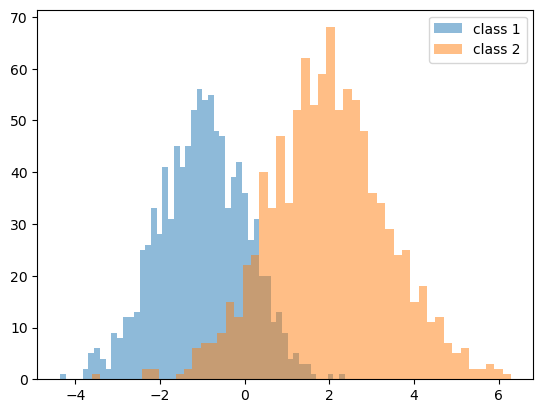

In [114]:
#draw histogram of c1 and c2
plt.hist(np.squeeze(c1),bins=50, alpha=0.5,label='class 1')
plt.hist(np.squeeze(c2),bins=50, alpha=0.5,label='class 2')
plt.legend(loc='upper right')
plt.show()

(d) Use ML estimate to find the mean and variance of each class given the dataset you created. 

In [115]:
#estimate the maximum likelihood
mean_c1, var_c1 = stats.norm.fit(c1, method = "MLE")
print(f"mean of class 1 = {mean_c1}")
print(f"variance of class 1 = {var_c1}")
mean_c2, var_c2 = stats.norm.fit(c2, method = "MLE")
print(f"mean of class 2 = {mean_c2}")
print(f"variance of class 2 = {var_c2}")

mean of class 1 = -1.0094327673862913
variance of class 1 = 1.027243937472917
mean of class 2 = 1.974433968332584
variance of class 2 = 1.3858934492594928


(e) Given your estimate of the model parameters, plot a pdf of two classes of data and find the 
decision boundary. Note that we have the same number of data points for both classes of data – 
equal prior. 

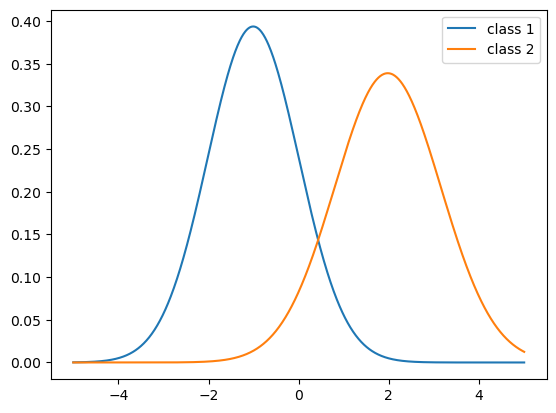

In [116]:
#plot pdf of two classes
x = np.linspace(-5, 5, 1000)
plt.plot(x, stats.norm.pdf(x, mean_c1, np.sqrt(var_c1)),label='class 1')
plt.plot(x, stats.norm.pdf(x, mean_c2, np.sqrt(var_c2)),label='class 2')
plt.legend(loc='upper right')
plt.show()

we have equal prior, that means we need to find the point where two likelihoods are equal
$P(x|c1) = P(x|c2)$ i.e., when their pdf are equal or
$$ x = \frac{\mu _2 \sigma _1^2-\sigma _2 \left(\mu _1 \sigma _2+\sigma _1 \sqrt{\left(\mu _1-\mu _2\right){}^2+2 \left(\sigma _1^2-\sigma _2^2\right) \ln \left(\frac{\sigma _1}{\sigma _2}\right)}\right)}{\sigma _1^2-\sigma _2^2}$$


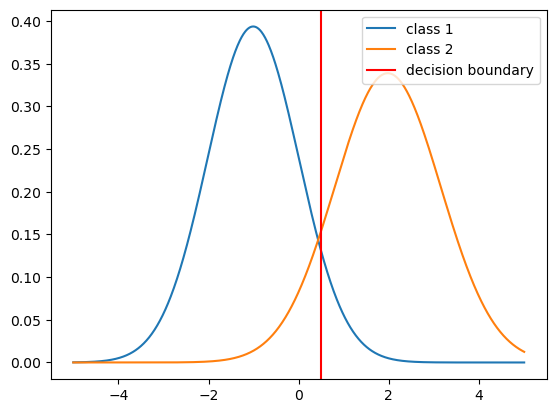

In [119]:
#find the decision boundary where two pdfs are equal
x_intercept = (mean_c2*var_c1 - np.sqrt(var_c2)*(mean_c1*np.sqrt(var_c2)+np.sqrt(var_c1)*np.sqrt((mean_c1-mean_c2)**2 + 2*(var_c1-var_c2)*np.log(var_c1/var_c2))))/(var_c1-var_c2)
#add line at x = x_intercept
x = np.linspace(-5, 5, 1000)
plt.plot(x, stats.norm.pdf(x, mean_c1, np.sqrt(var_c1)),label='class 1')
plt.plot(x, stats.norm.pdf(x, mean_c2, np.sqrt(var_c2)),label='class 2')
plt.axvline(x=x_intercept, color='r', linestyle='-',label='decision boundary')
plt.legend(loc='upper right')
plt.show()

(f) Given the empirical histogram you have in part (b), discuss the empirical decision boundary 
and what you found in (d). 

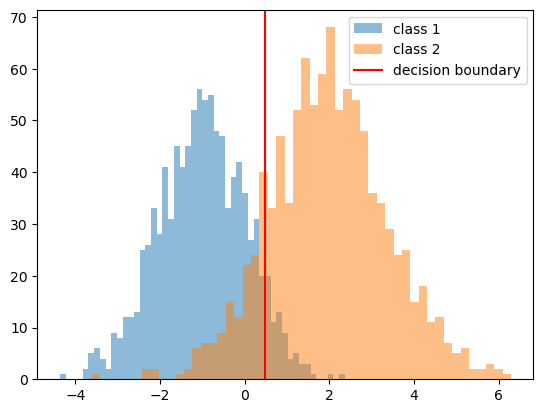

In [120]:
#draw histogram of c1 and c2
plt.hist(np.squeeze(c1),bins=50, alpha=0.5,label='class 1')
plt.hist(np.squeeze(c2),bins=50, alpha=0.5,label='class 2')
#draw a intercept line
plt.axvline(x=x_intercept, color='r', linestyle='-',label='decision boundary')
plt.legend(loc='upper right')
plt.show()

bla bla bla

(g) Change the number of data points in Class 2 to 2000 samples, and repeat (c) to (f). Here, 
consider unbalanced priors. 

(h) Define the error rate using sample data points and fitted model for the model with 1000 
samples (equal priors). 

(i) Define the error rate using sample data points and fitted model for the model with 1000 and 
2000 samples (unequal priors). 

(j) Build ROC curve for both datasets. For ROC curve, check ROC curve explained pdf file. 

## 3. MLE, MAP, Bernoulli Distribution, and Beta Prior (15 pts) 
Here, we want to learn: 
1. MLE with a simple example 
2. MAP and Bayesian prior 
3. Bayesian posterior 

(a) Let’s assume we have an unfair coin, where the probability of observing head ($X =1$) is 0.6. 
Draw 1000 samples from a Bernoulli distribution with a proper $p$. 

In [121]:
#draw 1000 samples from Ber(0.6)
sample = np.random.binomial(1, 0.6, 1000)

(b) ML estimation: Use the data created in part (a) to find the ML estimate for $p$. Plot your 
estimate of $p$ for the different number of samples. You will plot the ML estimate of $p$ as a 
function of the number of samples; you can have 1 sample, then 2, and .... 

As shown in the lecture, MLE of the $p$ is $\frac{n}{N}$ where $n$ is number of head and $N$ is the entire sample size.

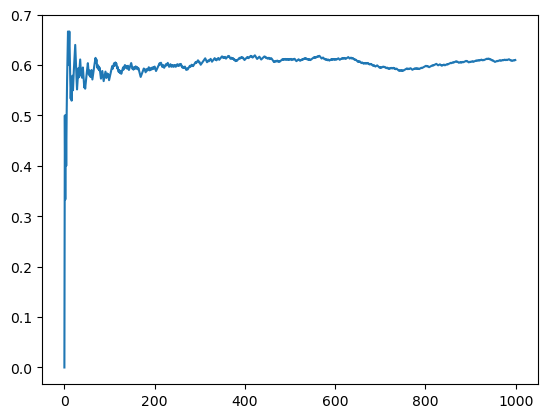

In [123]:
#plot n/N from truncated data
ratio = []
for i in range(1000):
    #draw sample from sample
    sample_i = sample[:i+1]
    #evaluate n/N
    n = np.sum(sample_i)
    N = len(sample_i)
    ratio.append(n/N)
#plot n/N
plt.plot(ratio)

(c) Shuffle your data created in (a) and repeat (b). Discuss what you see in (b) and (c). 

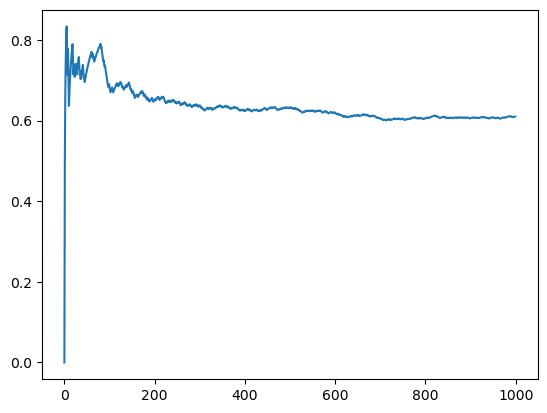

In [124]:
#shuffle the data
np.random.shuffle(sample)
#plot n/N from truncated data
ratio = []
for i in range(1000):
    #draw sample from sample
    sample_i = sample[:i+1]
    #evaluate n/N
    n = np.sum(sample_i)
    N = len(sample_i)
    ratio.append(n/N)
#plot n/N
plt.plot(ratio)

(d) Plot pdf of a Beta Distribution for $\alpha$ and $\beta$ of 2. $\alpha =\beta =2$ (check Beta distribution in Bishop 
text book or https://en.wikipedia.org/wiki/Beta_distribution ) 

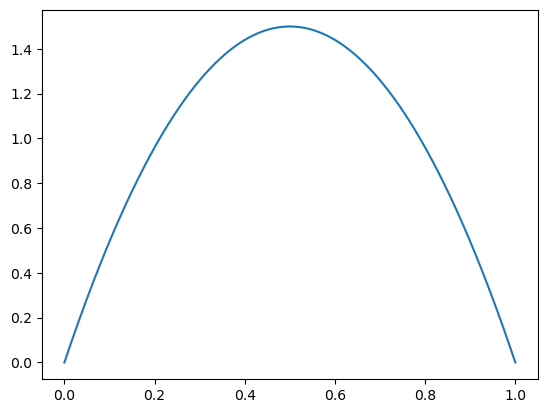

In [125]:
#plot pdf of beta distribution
x = np.linspace(0, 1, 1000)
plt.plot(x, stats.beta.pdf(x, 2, 2),label='beta(2,2)')

(e) Plot ML curve for the first 10 samples you drew in part (a). Here, you need to build the joint 
likelihood of the 10 samples where each sample is drawn independently from a Bernoulli 
distribution. Your likelihood for $x_i$, which is the outcome of ith sample and it is either 0 or 1, is defined by:
$$L(x_i|p) \propto p^{x_i}(1-p)^{1-x_i}$$

Note that we can interpret the function by noting that the likelihood of seeing 1 is $p/(1-p)$ time of seeing 0. Now, the joint likelihood of these 10 samples is defined by: 
$$L(x_1,x_2,...,x_{10}|p) \propto \prod_{i=1}^{10}L(x_i|p)$$
Now, you plug your 10 samples in the above equation and plot L as a function of $p$. You will 
partition the range of $p$, which is from 0 to 1, to 1000 bins and calculate L for each of these 
points.  

(0.0, 0.0015)

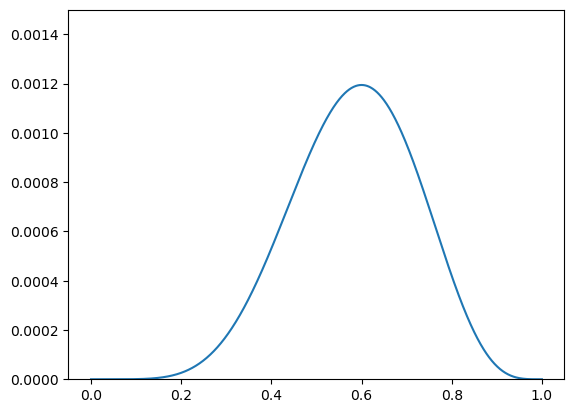

In [146]:
#plot L(x1,...,x10|p) as a function of p
x = np.linspace(0, 1, 1000)
#get 10 samples from part (a)
s = np.random.choice(sample, 10)
#evaluate L(x1,...,x10|p)
L = []
for i in range(1000):
    L.append(np.prod(stats.binom.pmf(s, 1, x[i])))
#plot L(x1,...,x10|p)
plt.plot(x, L)
#scale y axis from 0 to 0.0012
plt.ylim(0, 0.0015)


(f) We discussed Posterior is proportionate to Prior multiplied by Likelihood. Now, you can build 
your posterior by multiplication of two curves: part (e) and part (b). Create this plot and discuss your results. 

(0.0, 0.002)

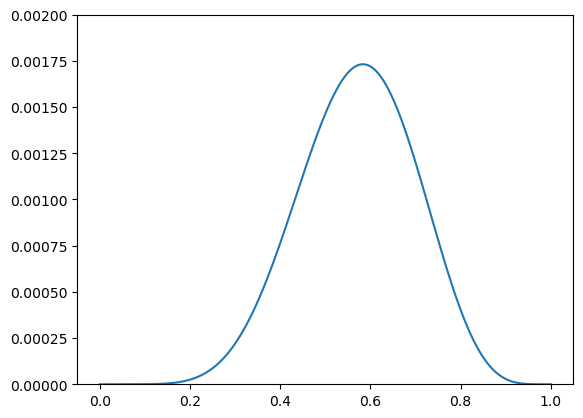

In [149]:
#multiply L(x1,...,x10|p) by beta(2,2)
L = []
for i in range(1000):
    L.append(np.prod(stats.binom.pmf(s, 1, x[i]))*stats.beta.pdf(x[i], 2, 2))
#plot L(x1,...,x10|p)
plt.plot(x, L)
plt.ylim(0, 0.002)

(g) From the graph in (f), find the MAP estimate for $p$. 

In [148]:
#find MAP estimate
MAP = x[np.argmax(L)]
print(f"MAP estimate = {MAP}")

MAP estimate = 0.5835835835835835


(h) From the graph in (f), find the variance of $p$. You can treat the graph as PMF now; just make 
sure the area under the curve or summation over the values of $p$ will be 1 – or, scale your curve 
accordingly.

In [157]:
#find variance of posterior
#find the expectation
E = np.trapz(L*x)
#find the variance
var = np.trapz(L*(x-E)**2)
print(f"variance = {var}")

0.04269238128630483


(i) Repeat steps (e) to (h) from 100 samples. 

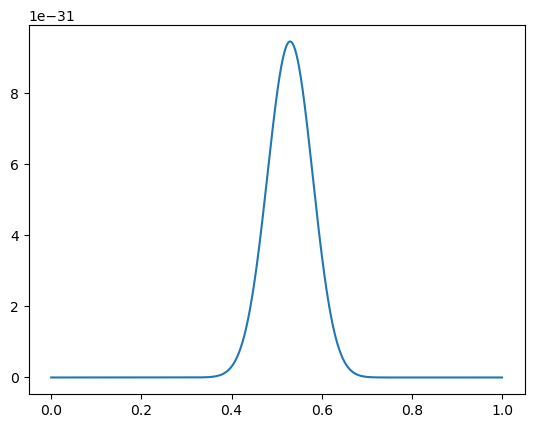

In [177]:
#plot L(x1,...,x10|p) as a function of p
x = np.linspace(0, 1, 1000)
#get 10 samples from part (a)
s = np.random.choice(sample, 100)
#evaluate L(x1,...,x10|p)
L = []
for i in range(1000):
    L.append(np.prod(stats.binom.pmf(s, 1, x[i])))
#plot L(x1,...,x10|p)
plt.plot(x, L)


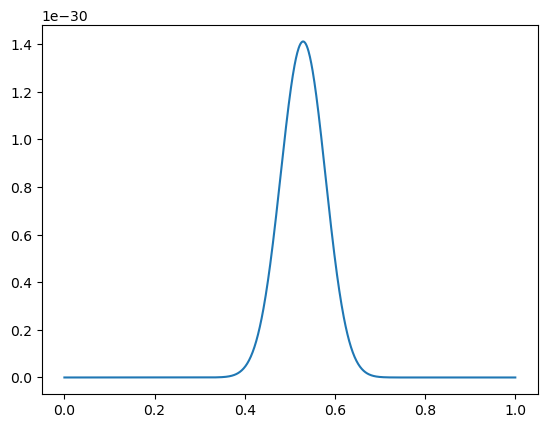

In [178]:
#multiply L(x1,...,x10|p) by beta(2,2)
L = []
for i in range(1000):
    L.append(np.prod(stats.binom.pmf(s, 1, x[i]))*stats.beta.pdf(x[i], 2, 2))
#plot L(x1,...,x10|p)
plt.plot(x, L)

In [179]:
#find MAP estimate
MAP = x[np.argmax(L)]
print(f"MAP estimate = {MAP}")

#find variance of posterior
#find the expectation
E = np.trapz(L*x)
#find the variance
var = np.trapz(L*(x-E)**2)
print(f"variance = {var}")

MAP estimate = 0.5295295295295295
4.892256303772215e-29


(j) Repeat steps (e) to (h) from 1000 samples. Discuss your results for different numbers of 
samples. 

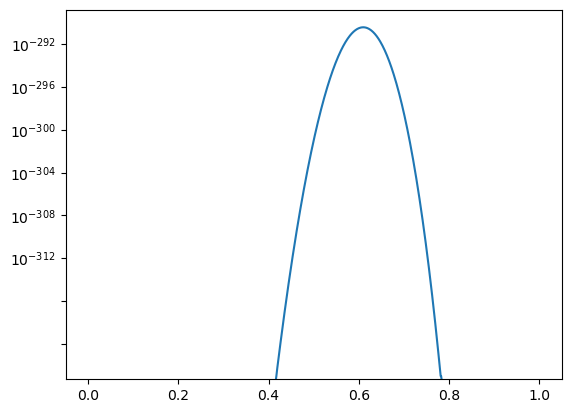

In [190]:
#plot L(x1,...,x10|p) as a function of p
x = np.linspace(0, 1, 1000)
#get 10 samples from part (a)
s = sample
#evaluate L(x1,...,x10|p)
L = []
for i in range(1000):
    L.append(np.prod(stats.binom.pmf(s, 1, x[i])))
#plot L(x1,...,x10|p)
plt.plot(x, L)
#log scale
plt.yscale('log')

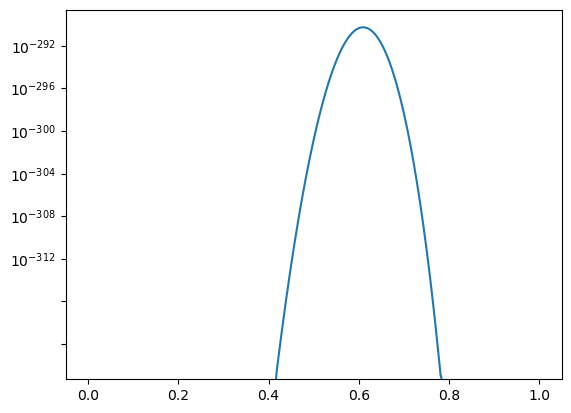

In [191]:
#multiply L(x1,...,x10|p) by beta(2,2)
L = []
for i in range(1000):
    L.append(np.prod(stats.binom.pmf(s, 1, x[i]))*stats.beta.pdf(x[i], 2, 2))
#plot L(x1,...,x10|p)
plt.plot(x, L)
plt.yscale('log')

In [193]:
#find MAP estimate
MAP = x[np.argmax(L)]
print(f"MAP estimate = {MAP}")

#find variance of posterior
#find the expectation
E = np.trapz(L*x)
#find the variance
var = np.trapz(L*(x-E)**2)
print(f"variance = {var}")

MAP estimate = 0.6096096096096096
variance = 7.541249074020115e-290


The result from differnt sample size shows that the MAP estimate converges to the true estimate the more the data we have. The variance of $p$ also decreases as the number of samples increases. This make the shape of the posterior more narrow and the peak of the posterior is more sharp like the dirac delta function.

## 4. Gaussian Mixture Model (15 pts) 
Here, we learn: 
1. Gaussian mixture models 
2. Multimodal distribution functions 
 
Let’s assume we have a Gaussian Mixture Model with 3 components. Parameters of this 
mixture model are: 
$$\begin{matrix}
\pi_1 = 0.1 & \pi_2 = 0.6 & \pi_3 = 0.3 \\
\mu_1 = \begin{bmatrix}3\\2\end{bmatrix} & \mu_2 = \begin{bmatrix}-5\\-3\end{bmatrix} & \mu_3 = \begin{bmatrix}4\\-2\end{bmatrix} \\
\Sigma_1 = \begin{bmatrix}1 & 0 \\0 & 1\end{bmatrix} & \Sigma_2 = \begin{bmatrix}2 & -1 \\-1 & 3\end{bmatrix} & \Sigma_3 = \begin{bmatrix}6 & 3 \\3 & 3\end{bmatrix}
\end{matrix}$$
 


(a)  Draw 1000 samples from this distribution and plot them in a scatter plot.

In [69]:
#draw 1000 samples from 2d gaussian mixture distribution
def gaussian_mixture(n):
    #this function will draw n samples from the gaussian mixture defined above
    X1,X2 = [],[]
    for i in range(n):
        #draw a sample from uniform(0,1)
        u = np.random.uniform(0,1)
        if u < 0.1:
            #draw a sample from class 1
            mean = [3,2]
            cov = [[1,0],[0,1]]
            x1, x2 = np.random.multivariate_normal(mean, cov, 1).T
            X1.append(x1)
            X2.append(x2)
        elif u < 0.6:
            #draw a sample from class 2
            mean = [-5,-3]
            cov = [[2,-1],[-1,3]]
            x1, x2 = np.random.multivariate_normal(mean, cov, 1).T
            X1.append(x1)
            X2.append(x2)
        else:
            #draw a sample from class 3
            mean = [4,-2]
            cov = [[6,3],[3,3]]
            x1, x2 = np.random.multivariate_normal(mean, cov, 1).T
            X1.append(x1)
            X2.append(x2)
    return np.squeeze(X1), np.squeeze(X2)

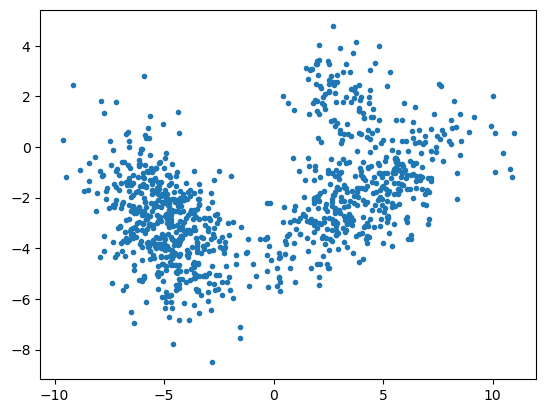

In [76]:
#plot the samples
x1,x2 = gaussian_mixture(1000)
plt.plot(x1, x2, '.')

(b)  Calculate empirical mean and covariance of the samples you drew. 

In [80]:
#empirical mean 
mean = [np.mean(x1), np.mean(x2)]
#empirical covariance
X = np.stack((x1, x2), axis=0)
cov = np.cov(X)
print(f"empirical mean = {mean}")
print(f"empirical covariance = {cov}")

empirical mean = [-0.6599685518759404, -2.1309692787175853]
empirical covariance = [[23.10425937  4.29107256]
 [ 4.29107256  4.68881625]]


(c)  Draw 1000 samples from a multivariate normal distribution with the mean and covariance 
you estimated in (b). 

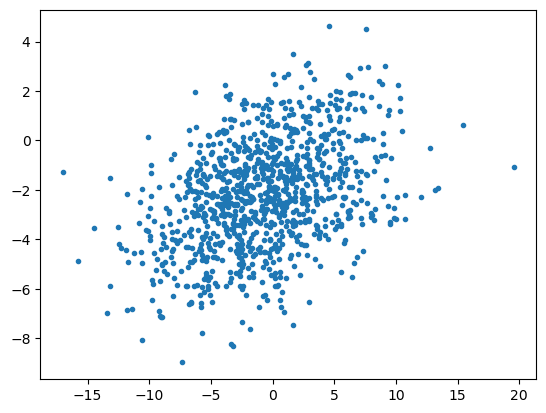

In [81]:
#draw 1000 sample from 2d gaussian distribution
x1, x2 = np.random.multivariate_normal(mean, cov, 1000).T
#plot x1 and x2
plt.plot(x1, x2, '.')

(d)  Discuss to what extent samples in (c) represent the mixture model and what is their 
difference. 

The sample in (c) is more or less the representation of the data if it were drawn from the same distribution where the mean of (c) is the summarized mean from each mode of the mixture model. However, the clear difference is that the covariance of (c) is the same for all the modes, while the covariance of the mixture model is different for each mode. Thus, shows the explicit cluster in the scatter plot.

(e)  Let’s assume we want to cluster the data points in part (a) to three clusters. Suggest a 
solution to do this task. Please note a solution might be K-means clustering (k=3); you can 
use K-means or any other solutions here. Discuss your cluster outcome. 

Let's do K-means clustering.

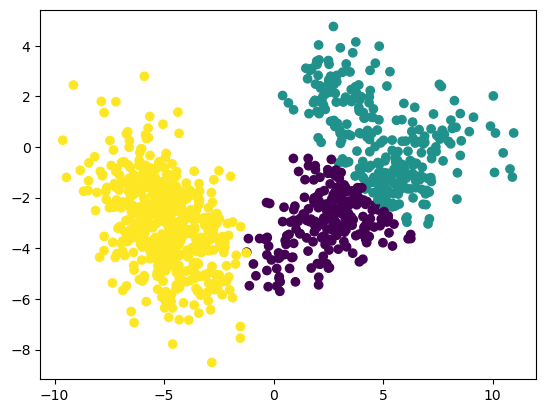

In [79]:
#k-mean clustering from scratch
def k_mean_clustering(X, k, max_iter = 100):
    #this function will perform k-mean clustering on the data X
    #initialize the cluster centers
    centers = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), size=(k,2))
    #initialize the cluster assignment
    assignment = np.zeros(X.shape[0])
    #loop for max_iter iterations
    for i in range(max_iter):
        #compute the distance between each data point and each cluster center
        dist = np.zeros((X.shape[0], k))
        for j in range(k):
            dist[:,j] = np.sum((X-centers[j])**2, axis=1)
        #assign each data point to the cluster with the closest center
        assignment = np.argmin(dist, axis=1)
        #update the cluster centers
        for j in range(k):
            centers[j] = np.mean(X[assignment==j], axis=0)
    return assignment

#apply k-mean to the data from (a)
assignment = k_mean_clustering(np.stack((x1, x2), axis=1), 3)
#plot the data with different colors for different clusters
plt.scatter(x1, x2, c=assignment)

In [82]:
#find the proportion of data points in each cluster
for i in range(3):
    print(f"proportion of data points in cluster {i} = {np.sum(assignment==i)/assignment.shape[0]}")

proportion of data points in cluster 0 = 0.214
proportion of data points in cluster 1 = 0.273
proportion of data points in cluster 2 = 0.513


The outcome shows the likely point to be in each cluster. Note that the proportion of the sample drawn from the gausian mixture model is not the same as the proportion of the sample drawn from the K-means clustering. However, the center of each cluster captures the mean and the covariance on each gaussian distribution.